<a href="https://colab.research.google.com/github/VictorHeitzman/An-lise-elei-es-2020-no-Brasil/blob/main/Elei%C3%A7%C3%B5es_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# modelagem de dados

import pandas as pd
import numpy as np

# libs gráfica
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# avisos
import warnings
warnings.filterwarnings('ignore')

# configurando pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# configuração matplot
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('ggplot')

# **Importação dos dados**


In [ ]:
# Dados
basedados = pd.read_csv('/clean_data.csv')

basedados.shape

(518675, 29)

In [ ]:
# verificar dados
basedados.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [ ]:
# info
basedados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [ ]:
# nulos
basedados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [ ]:
# campos unicos
basedados.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [ ]:
# remover coluna
basedados.drop(columns = [ 'Unnamed: 0'], inplace=True)

In [ ]:
basedados.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


## **Análise macros**

## **Prefeitos eleitos no País**

In [ ]:
# campos nulos
print(basedados['job'].unique())
print(basedados['elector_count'].unique())

['prefeito' 'vereador']
['n' 's']


In [ ]:
# Aplicando filtro

query_prefeitos = basedados[
    (basedados['job'] == 'prefeito') &
    (basedados['elector_count'] == 's')
]

# dimensão
query_prefeitos.shape

(5519, 28)

In [ ]:
# Agrupando quantidade de votos por partido
votosPrefeitoPartido = query_prefeitos.groupby(by = ['main_party']).agg(
    quantidade = ('candidate_vote_count', 'count')
)

votosPrefeitoPartido.head()

,quantidade
main_party,
AVANTE,82
CIDADANIA,141
DC,1
DEM,467
MDB,787


In [ ]:
# quantidade de prefeitos eleitos
qtdPrefeitosEleitos = votosPrefeitoPartido['quantidade'].sum()

qtdPrefeitosEleitos

5519

In [ ]:
# gerando coluna %
votosPrefeitoPartido['%'] = votosPrefeitoPartido['quantidade'] / qtdPrefeitosEleitos * 100
votosPrefeitoPartido['%'] = round(votosPrefeitoPartido['%'],2)

# ordenar
votosPrefeitoPartido.sort_values('quantidade', inplace = True, ascending = False)

votosPrefeitoPartido.head()

,quantidade,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [ ]:
# paleta de cores
sns.color_palette('magma',len(votosPrefeitoPartido))

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

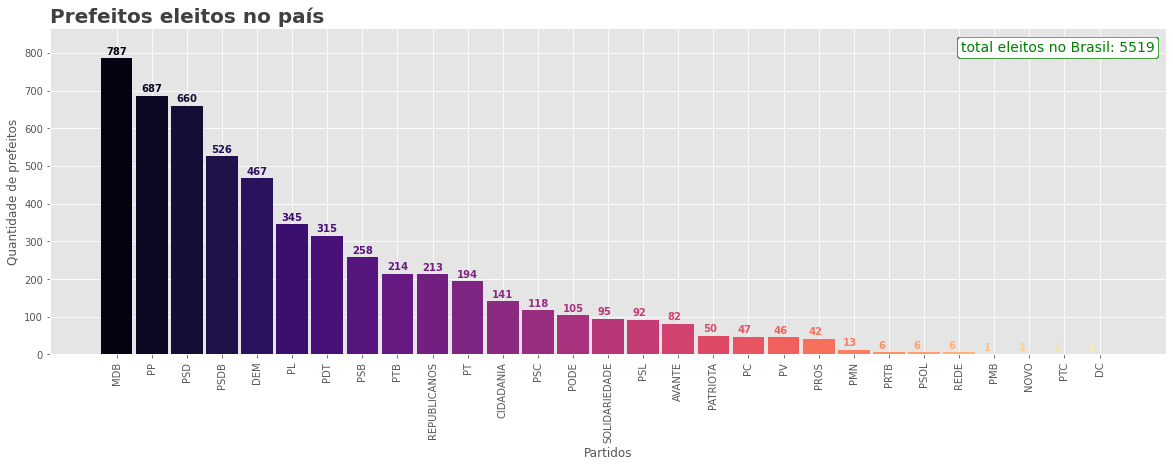

In [ ]:
# tamanho
plt.figure( figsize = (20,6))

# Paleta
paletaCores = sns.color_palette('magma',len(votosPrefeitoPartido))

# plot
plt.bar(
    votosPrefeitoPartido.index,
    votosPrefeitoPartido['quantidade'],
    width=0.9,
    color=paletaCores 
    );

# Título
plt.title('Prefeitos eleitos no país', loc='left', fontsize=20, color='#404040', fontweight = 600);

# Labels
plt.ylabel('Quantidade de prefeitos')
plt.xlabel('Partidos')
plt.xticks(rotation=90);

# Ajuste de escala do gráfico
plt.ylim(0,
         votosPrefeitoPartido['quantidade'].max() + (votosPrefeitoPartido['quantidade'].max() * 0.1)
         )

# incluindo os dados no gráfico
for posicao, valor in enumerate(votosPrefeitoPartido['quantidade']):
  plt.text(
      # posicao x, y
      posicao -0.3,
      valor +10,
      # valor
      valor,
      # paleta
      color = paletaCores[posicao], 
      # tamanho
      size=10,
      # espesura
      fontweight = 700
  )

  totalEleitos =votosPrefeitoPartido['quantidade'].sum()

  # info complementar
  plt.annotate(
      f'total eleitos no Brasil: {totalEleitos}',
      xy=(0.99,0.94),
      xycoords='axes fraction',
      ha='right',
      va='center',
      color='green',
      fontsize=14,
      fontweight=100,
      bbox=dict(facecolor='#ffffff', edgecolor='green',boxstyle='round', pad=0.25)
  )


## **Veriadores eleitos no País**

In [ ]:
basedados

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518670,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,23610,IRACI,CIDADANIA,,Válido,11,411.0,vereador,CIDADANIA
518671,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43888,WANILDE AVELINO,PV,,Válido,22,411.0,vereador,PV
518672,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,17555,GILVAN MARTINS,PSL,,Válido,61,411.0,vereador,PSL
518673,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43444,ALANE MONTEIRO,PV,,Válido,5,411.0,vereador,PV


In [ ]:
# Aplicando filtro

query_vereadores = basedados[
    (basedados['job'] == 'vereador') &
    (basedados['elector_count'] == 's')
]

# dimensão
query_vereadores.shape

(57866, 28)

In [ ]:
# Agrupando quantidade de votos por partido
votosVereadoresPartido = query_vereadores.groupby(by = ['main_party']).agg(
    quantidade = ('candidate_vote_count', 'count')
)

votosVereadoresPartido.head()

,quantidade
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [ ]:
# quantidade de Veriadores eleitos
qtdVereadoresEleitos = votosVereadoresPartido['quantidade'].sum()

qtdVereadoresEleitos

57866

In [ ]:
# gerando coluna %
votosVereadoresPartido['%'] = votosVereadoresPartido['quantidade'] / qtdVereadoresEleitos * 100
votosVereadoresPartido['%'] = round(votosVereadoresPartido['%'],2)

# ordenar
votosVereadoresPartido.sort_values('quantidade', inplace = True, ascending = False)

votosVereadoresPartido.head()

,quantidade,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


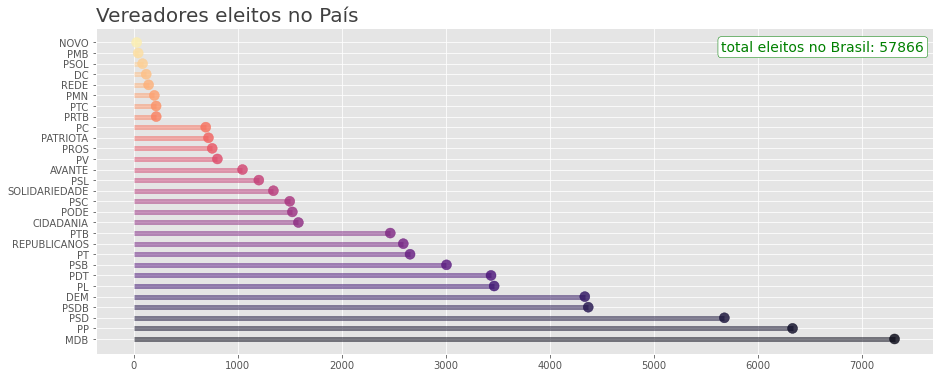

In [ ]:
# Plot
plt.hlines(
    y=votosVereadoresPartido.index,
    xmin=0,
    xmax=votosVereadoresPartido['quantidade'],
    # Espesura da linha
    lw = 5,
    # Cores
    color=paletaCores,
    alpha=0.5
);

# plot de indicadores
plt.scatter(
    # Dados
    votosVereadoresPartido['quantidade'],
    votosVereadoresPartido.index,
    # Tamanho
    s=100,
    # cor
    color=paletaCores,
    # Transparencia
    alpha=0.8
)

totalEleitos =votosVereadoresPartido['quantidade'].sum()

  # info complementar
plt.annotate(
    f'total eleitos no Brasil: {totalEleitos}',
    xy=(0.99,0.94),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=14,
    fontweight=100,
    bbox=dict(facecolor='#ffffff', edgecolor='green',boxstyle='round', pad=0.25)
  )

plt.title('Vereadores eleitos no País', loc='left', fontsize=20, color='#404040', fontweight=500 );

## **Análise de Correlação**

In [ ]:
# Verificar dimensão igual
len(votosPrefeitoPartido), len(votosVereadoresPartido)

(29, 29)

In [ ]:
# Tabela
tabCorrelacao = votosPrefeitoPartido['quantidade'].reset_index()

# Cruzamento
tabCorrelacao = pd.merge(tabCorrelacao, votosVereadoresPartido.reset_index(), on=['main_party'], how='inner')

# Ajustar
tabCorrelacao.columns = ['Partido', 'Prefeitos', 'Vereadores', '%']

# Apagar
tabCorrelacao.drop(columns=['%'], inplace=True)


tabCorrelacao

,Partido,Prefeitos,Vereadores
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335
5,PL,345,3464
6,PDT,315,3434
7,PSB,258,3006
8,PTB,214,2466
9,REPUBLICANOS,213,2591


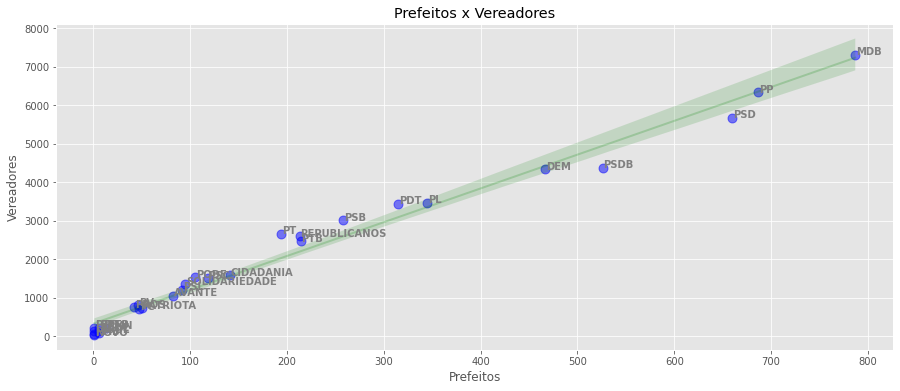

In [ ]:
sns.regplot(
    # dados
    x = tabCorrelacao['Prefeitos'],
    y = tabCorrelacao['Vereadores'],
    # intervalo de confiança para estimar a regressão
    ci = 95,
    # cores
    scatter_kws={
        'color': 'blue',
    's':80,
    'alpha':0.5,
    },
    # cor da linha
    line_kws={
        'color' :'green',
        'alpha': 0.2,
        'lw':2
    },
);

# título
plt.title('Prefeitos x Vereadores');

for linha in range(0,tabCorrelacao.shape[0]):
  plt.text(
      tabCorrelacao['Prefeitos'][linha] + 0.8,
      tabCorrelacao['Vereadores'][linha],
      tabCorrelacao['Partido'][linha],
      size='medium',
      color='gray',
      weight='semibold'
  )

## **Plot tridimensional**

In [ ]:
quantidadeCandidatos = basedados.groupby(by=['main_party']).count().iloc[:,1].reset_index()

quantidadeCandidatos.columns = ['Partido','Candidatos']

quantidadeCandidatos.sort_values('Candidatos', inplace = True, ascending = False)

quantidadeCandidatos.head()

,Partido,Candidatos
4,MDB,42169
20,PSD,37271
15,PP,36158
3,DEM,31212
21,PSDB,31011


In [ ]:
# Cruzar
tabCorrelacao = pd.merge(tabCorrelacao, quantidadeCandidatos, on=['Partido'], how='inner')

# Verificar
tabCorrelacao.head()

,Partido,Prefeitos,Vereadores,Candidatos
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271
3,PSDB,526,4368,31011
4,DEM,467,4335,31212


In [ ]:
# Correlação
tabCorrelacao.corr()

,Prefeitos,Vereadores,Candidatos
Prefeitos,1.000000,0.990918,0.916985
Vereadores,0.990918,1.000000,0.952979
Candidatos,0.916985,0.952979,1.000000


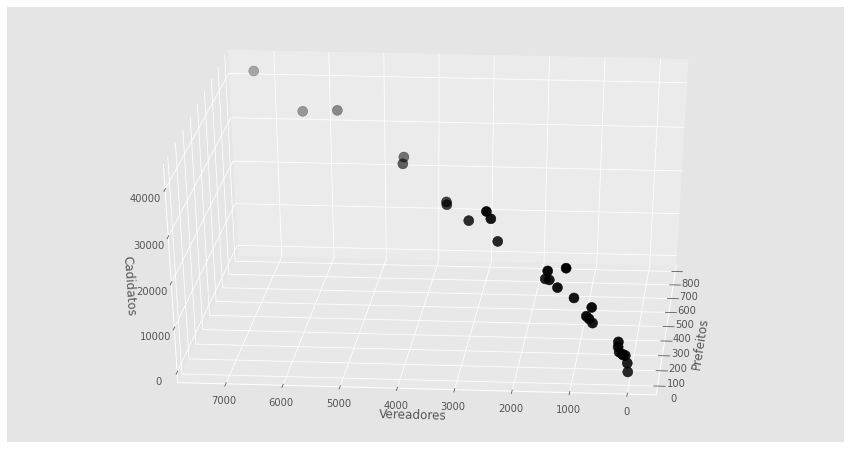

In [ ]:
# Plot Tridimensional

# Tamanho
Figura = plt.figure( figsize=(15, 8) )

# Instanciar
Eixo = Figura.add_subplot( 111, projection='3d' )

# Plot
Eixo.scatter(
    tabCorrelacao['Prefeitos'],
    tabCorrelacao['Vereadores'],
    tabCorrelacao['Candidatos'],
    c='black',
    s=100
)

# Rotacao
Eixo.view_init(30, 185)

# Labels
Eixo.set_xlabel('Prefeitos')
Eixo.set_ylabel('Vereadores')
Eixo.set_zlabel('Cadidatos');

In [ ]:
Figura = px.scatter_3d(
    tabCorrelacao,
    x='Prefeitos',
    y='Vereadores',
    z='Candidatos',
    color='Partido',
    opacity=0.7
)

Figura.show()